<a href="https://www.kaggle.com/code/adityayadav01/tehran-house-prediction?scriptVersionId=203711803" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tehran-house-prices-dataset/TehranHouse.csv


In [2]:
df = pd.read_csv('/kaggle/input/tehran-house-prices-dataset/TehranHouse.csv')

In [3]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
716,46,1,True,True,False,Andisheh,4.500000e+08,15000.00
1996,170,3,False,False,False,Gheitarieh,1.450000e+10,483333.33
616,75,1,True,True,True,Ekhtiarieh,3.900000e+09,130000.00
2766,73,2,False,True,False,West Ferdows Boulevard,1.840000e+09,61333.33
1150,65,1,True,True,True,Shahran,2.220000e+09,74000.00


In [4]:
df.shape

(3479, 8)

In [5]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


In [8]:
df.duplicated().sum()

208

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,Room,Price,Price(USD)
count,3248.000000,3.248000e+03,3.248000e+03
mean,2.088054,5.478118e+09,1.826039e+05
std,0.764716,8.267916e+09,2.755972e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.420000e+09,4.733333e+04
50%,2.000000,2.977500e+09,9.925000e+04
75%,2.000000,6.200000e+09,2.066667e+05
max,5.000000,9.240000e+10,3.080000e+06


In [11]:
df.head(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
## Converting "area" to int
df['Area'] = df['Area'].str.replace(',', '').astype(int)


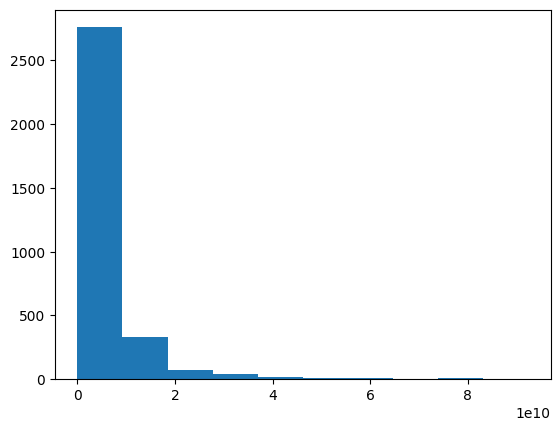

In [14]:
plt.hist(x='Price',data=df)
plt.show()

<Axes: xlabel='Price(USD)'>

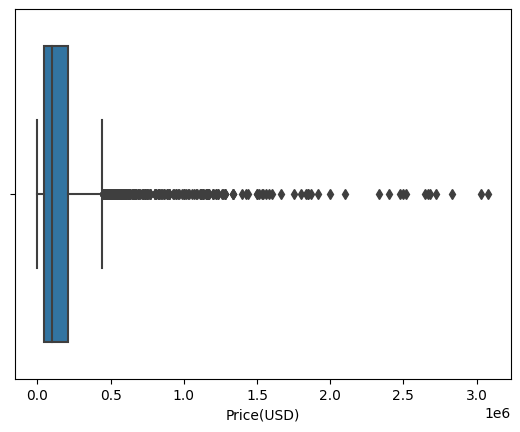

In [15]:
sns.boxplot(x='Price(USD)',data=df)

In [16]:
df.drop(['Price'],inplace=True,axis=1)

In [17]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD)
0,63,1,True,True,True,Shahran,61666.67
1,60,1,True,True,True,Shahran,61666.67
2,79,2,True,True,True,Pardis,18333.33
3,95,2,True,True,True,Shahrake Qods,30083.33
4,123,2,True,True,True,Shahrake Gharb,233333.33


In [18]:
# sns.pairplot(df)

In [19]:
## Assigning "uncommon" to least occuring data points
counts = df['Address'].value_counts()
# df['brand'].nunique()
threshold=100
repl = counts[counts <= threshold].index
df['Address'] = df['Address'].replace(repl,'uncommon')

In [20]:
df['Address'].unique()

array(['Shahran', 'Pardis', 'uncommon', 'West Ferdows Boulevard',
       'Saadat Abad', 'Parand', 'Punak', 'Gheitarieh'], dtype=object)

In [21]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD)
0,63,1,True,True,True,Shahran,61666.67
1,60,1,True,True,True,Shahran,61666.67
2,79,2,True,True,True,Pardis,18333.33
3,95,2,True,True,True,uncommon,30083.33
4,123,2,True,True,True,uncommon,233333.33


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [23]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:6],df.iloc[:,-1],test_size=0.2,random_state=2)

In [24]:
trf = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[2,3,4,5])
],remainder='passthrough')

In [25]:
X_train.shape,X_test.shape

((2598, 6), (650, 6))

In [26]:
trf2 = ColumnTransformer(transformers=[
    ('scale',StandardScaler(),slice(0,14))
]
)

In [27]:
lr = LinearRegression()

In [28]:
pipe = Pipeline([
    ('trf2',trf),
    ('trf3',trf2),
    ('model',lr)
])

In [29]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 14, None))])),
                ('model', LinearRegression())])

In [30]:
y_pred = pipe.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,accuracy_score

In [32]:
print("MAE is",mean_absolute_error(y_test, y_pred))
print("MSE is",mean_squared_error(y_test, y_pred))
print("RMSE is ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score is ",r2_score(y_test, y_pred))

MAE is 125752.79355146273
MSE is 62844444749.96339
RMSE is  250687.94296886993
R2 score is  0.3509978904266877
